In [239]:
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [240]:
data = pd.read_csv("/Users/luizasemeniuk/Downloads/Amazon Books Data.csv")

In [241]:
data.head()

,title,description,author,isbn10,isbn13,publish_date,edition,best_seller,top_rated,rating,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,The Staff Engineer's Path,A Guide for Individual Contributors Navigating...,Tanya Reilly,1098118731,978-1098118730,2022-10-25,1,Yes,No,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cracking the Coding Interview,189 Programming Questions and Solutions,Gayle Laakmann McDowell,984782869,978-0984782857,2015-07-01,6,Yes,No,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Python Crash Course, 3rd Edition","A Hands-On, Project-Based Introduction to Prog...",Eric Matthes,1718502702,978-1718502703,2023-01-10,3,Yes,No,4.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The Pragmatic Programmer,"20th Anniversary Edition, 2nd Edition: Your Jo...",David Thomas,NaN,978-0135957059,2019-09-13,2,Yes,No,4.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Clean Code,A Handbook of Agile Software Craftsmanship,Robert C. Martin,NaN,978-0132350884,2008-08-01,1,Yes,No,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Usuwamy puste kolumny i wiersze:

In [242]:
data.dropna(axis=1, how='all', inplace= True)

In [243]:
data.dropna(inplace=True)

In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 466
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         293 non-null    object
 1   description   293 non-null    object
 2   author        293 non-null    object
 3   isbn10        293 non-null    object
 4   isbn13        293 non-null    object
 5   publish_date  293 non-null    object
 6   edition       293 non-null    object
 7   best_seller   293 non-null    object
 8   top_rated     293 non-null    object
 9   rating        293 non-null    object
 10  review_count  293 non-null    object
 11  price         293 non-null    object
dtypes: object(12)
memory usage: 29.8+ KB


In [245]:
data.head()

,title,description,author,isbn10,isbn13,publish_date,edition,best_seller,top_rated,rating,review_count,price
0,The Staff Engineer's Path,A Guide for Individual Contributors Navigating...,Tanya Reilly,1098118731,978-1098118730,2022-10-25,1,Yes,No,4.7,189,$31.99
1,Cracking the Coding Interview,189 Programming Questions and Solutions,Gayle Laakmann McDowell,984782869,978-0984782857,2015-07-01,6,Yes,No,4.7,8334,$33.21
2,"Python Crash Course, 3rd Edition","A Hands-On, Project-Based Introduction to Prog...",Eric Matthes,1718502702,978-1718502703,2023-01-10,3,Yes,No,4.8,165,$30.61
6,"Automate the Boring Stuff with Python, 2nd Edi...",Practical Programming for Total Beginners,Al Sweigart,1593279922,978-1593279929,2019-11-12,2,Yes,No,4.7,2858,$29.99
7,The Manager's Path,A Guide for Tech Leaders Navigating Growth and...,Camille Fournier,1491973897,978-1491973899,2017-05-02,1,Yes,No,4.6,2504,$30.49


Sprawdzimy po kolei w każdej kolumnie czy dane wymagają poprawy:

In [246]:
data['edition'].unique()


array(['1', '6', '3', '2', '5', '4', '7', 'New', '10'], dtype=object)

In [247]:
data['top_rated'].unique() 

KeyError: 'top_rated'

In [248]:
data.rename(columns={'top_rated ': 'top_rated'}, inplace=True) #usuwam spację w nazwie kolumny

In [ ]:
print(data.columns.tolist()) 

In [ ]:
data['best_seller'].unique()

In [ ]:
data['rating'].unique()

In [ ]:
data['review_count'].unique()

In [ ]:
data['price'].unique()

In [ ]:
data['top_rated'].unique()

Funkcja czyszcząca dane:

In [249]:
def clean_data(data):
    data['best_seller'] = data['best_seller'].astype(str).str.replace('no', 'No').str.replace('yes', 'Yes').str.replace('NO', 'No').str.replace('YES', 'Yes')
    data['rating'] = data['rating'].astype(str).str.replace('$','').astype(float)
    data['price']= data['price'].astype(str).str.replace('$','').astype(float)
    data['review_count']= data['review_count'].astype(str).str.replace(',','').astype(int)
    data['top_rated']= data['top_rated'].astype(str).str.replace('NO','No')

In [250]:
clean_data(data)

In [ ]:
data.head()

Przedstawimy na wykresie top 10 autorów, którzy napisali najwięcej bestsellerów: 
liczymy ilość bestsellerów dla każdego autora:

In [ ]:
bestsellery_top= data.groupby('author')['best_seller'].apply(lambda x: (x == 'Yes').sum())

Sortujemy malejąco:

In [ ]:
bestsellery_top.sort_values(ascending= False)

In [ ]:
top10= bestsellery_top.sort_values(ascending= False).head(10)
print(top10)

Powalające liczby :))

Wykres:

In [ ]:
top10.plot(kind='bar', title='Autorzy z największa liczbą napisanych bestsellerów', color='blue')
plt.xlabel('Autorzy')
plt.ylabel('Liczba bestsellerów')
plt.show()

Teraz zbadamy 'bestsellerowość' książek a inne zmienne. Weźmiemy pod uwagę cenę, sumę opinii i średnie opinie.

1. Średnia ilość opinii dla bestsellerów vs innych książek:

In [ ]:
opinie_ilosc= data.groupby('best_seller')['review_count'].mean()

In [ ]:
opinie_ilosc.plot(kind='bar',  color='skyblue')
plt.xlabel('Czy bestseller?') 
plt.ylabel('Średnia ilość opinii')  
plt.show()

Ewidentnie bestsellery są bardziej popularne wśród czytelników niż nie-bestsellery.

2. Średnie opinie- od jakiej średniej opinii zaczyna się bestseller? Sprawdzamy:

In [ ]:
bestseller_minimum = data.groupby('best_seller').rating.min()

In [ ]:
bestseller_minimum

Czyli bestsellery mają rating minimum 3.7

3. Jaka jest średnia opinii o bestsellerach na tle innych książek?


In [ ]:
bestseller_srednia= data.groupby('best_seller').rating.mean()

In [ ]:
sns.barplot(x=bestseller_srednia.index, y=bestseller_srednia.values, palette='coolwarm')  # Custom color palette
plt.title("Średnia ocena bestsellerów a innych książek")
plt.xlabel("Czy bestseller?")
plt.ylabel("Średnia ocena")


Średnia ocena różni się na korzyść bestsellerów, ale tylko nieznacznie.

Czy bestsellery są wydawane średnio więcej razy niż inne pozycje?

In [251]:
#usuwamy 'new' z edycji i zamieniamy na int zeby obliczyc srednią:
data['edition']= data['edition'].astype(str).replace('New','2').astype(int) #założyłam, że 'nowa' edycja bez specyfikacji która to konkrenie edycja jest druga. 

In [252]:
bestseller_edycje= data.groupby('best_seller').edition.mean()

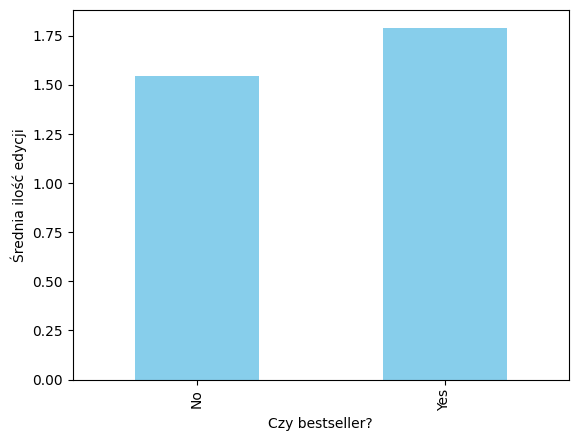

In [253]:
bestseller_edycje.plot(kind='bar',  color='skyblue')
plt.xlabel('Czy bestseller?') 
plt.ylabel('Średnia ilość edycji')  
plt.show()

In [ ]:
Bestsellery mają 